In [3]:
import sys
selenium_path = r'C:\Users\Smile\Desktop\ml\env\Lib\site-packages'

# Add the path to sys.path
sys.path.append(selenium_path)
import pandas as pd
import time
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

In [6]:
# Specify the path to the directory containing the Chrome driver executable
chrome_driver_path = '/browserDrivers/chromedriver-win64/chromedriver.exe'  # Replace with the actual path

# Create Chrome options if needed (e.g., for setting preferences)
chrome_options = webdriver.ChromeOptions()
# Add any desired options here

chrome_options.binary_location = chrome_driver_path

# Create the Chrome driver instance
driver = webdriver.Chrome(options=chrome_options)

# Now you can use the 'driver' object to interact with the browser


In [7]:
page_url ="https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

## find books


In [8]:
from selenium.webdriver.common.by import By

book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [9]:
book_categories[0].text

'Category:Baptism of Fire characters'

In [10]:
#getting link of the book
book_categories[0].get_attribute('href')

'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'

In [11]:
driver.get('https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters')

In [12]:
character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [13]:
character_elements[0].text

'Adalia'

## Full code


In [14]:

#create driver
# Specify the path to the directory containing the Chrome driver executable
chrome_driver_path = '/browserDrivers/chromedriver-win64/chromedriver.exe'  # Replace with the actual path

# Create Chrome options if needed (e.g., for setting preferences)
chrome_options = webdriver.ChromeOptions()
# Add any desired options here

chrome_options.binary_location = chrome_driver_path

# Create the Chrome driver instance
driver = webdriver.Chrome(options=chrome_options)
#go to the characters in books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)


#find books
books=[]
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name' : book_name , "url": book_url})

In [15]:
books

[{'book_name': 'Category:Baptism of Fire characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters'},
 {'book_name': 'Category:Blood of Elves characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Blood_of_Elves_characters'},
 {'book_name': "Godamba Thaess'en",
  'url': 'https://witcher.fandom.com/wiki/Godamba_Thaess%27en'},
 {'book_name': 'Category:Season of Storms characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Season_of_Storms_characters'},
 {'book_name': 'Category:Something Ends, Something Begins characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Something_Ends,_Something_Begins_characters'},
 {'book_name': 'Category:Sword of Destiny characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Sword_of_Destiny_characters'},
 {'book_name': 'Category:Szpony i kły characters',
  'url': 'https://witcher.fandom.com/wiki/Category:Szpony_i_k%C5%82y_characters'},
 {'book_name': 'Category:Tales from the world of The W

In [ ]:
character_list = []
for book in books:
    #go to book page
    driver.get(book['url'])
    character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    for ele in character_elements:
        character_list.append({'book': book['book_name'],'character':ele.text})
        

In [41]:
pd.DataFrame(character_list)

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs
...,...,...
1271,Category:Time of Contempt characters,Yanna of Murivel
1272,Category:Time of Contempt characters,Yarpen Zigrin
1273,Category:Time of Contempt characters,Yennefer of Vengerberg
1274,Category:Time of Contempt characters,Yiolenta Suarez


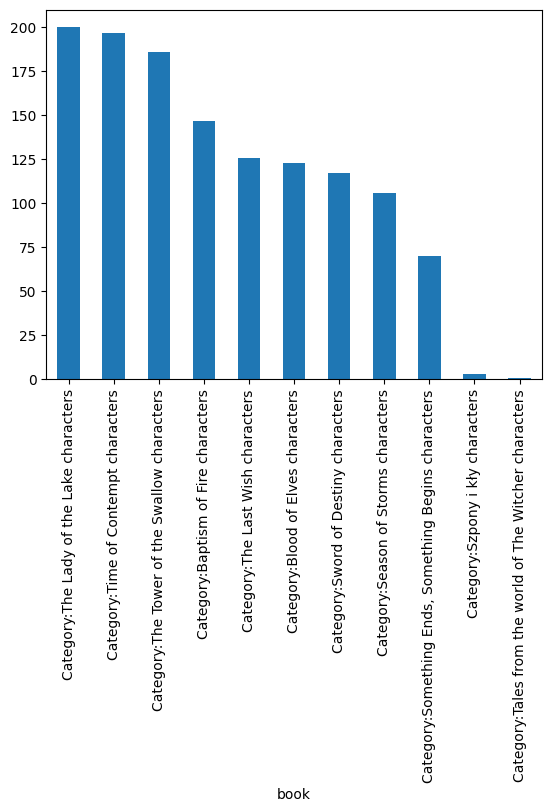

In [45]:
import matplotlib.pyplot as plt
character_df = pd.DataFrame(character_list)
character_df['book'].value_counts().plot(kind="bar")
plt.show()